In [1]:
# Note: The codes were originally created by Prof. Jack Baker in the MATLAB

from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
from fn_PSHA_given_M_lambda import fn_PSHA_given_M_lambda
from gmpe_eval import gmpe_eval
from scipy.interpolate import interp1d
import h5py
%matplotlib inline

In [2]:
x = np.logspace(np.log10(0.001), np.log10(3), 100) # IM values to consider 
IM_label = 'SA(1s)'
gmpeFlag = 2  # use CY2014

# Periods of interest
TFull = list(np.arange(0.01,0.06,step=0.01)) + list(np.arange(0.1,1.025,step=0.025)) + list(np.arange(1.5, 5.25,step=0.25))  
TExample = [0.1, 1, 3]

# Seismicity parameters (strike slip)
rup = {"Fault_Type":1, "Vs30":500, "R":10, "Ztor":0, "delta":90, "rupLambda":0, "Z10":999, "Fhw":0, "FVS30":0, "region":1}

# Plotting parameters
figureAxisLimits = [0.05, max(x), 0.99e-5, 1e-1]
figureXTickVals = [0.05, 0.1, 0.5, 1, 3]


In [3]:
# Point source with G-R magnitudes

# From Table 3.5, \label{tab:grExample_mMax}, fixed rate of M>5, M_max = 8
lambda_M = [0.05, 0.03153, 0.01988, 0.01252, 0.007882, 0.004955, 0.003108, 0.001942, 0.001207, 0.0007432, 0.0004505, 0.0002657, 0.0001492,7.57e-05, 2.93e-05]
M_vals = [5.1, 5.3, 5.5, 5.7, 5.9, 6.1, 6.3, 6.5, 6.7, 6.9, 7.1, 7.3, 7.5, 7.7, 7.9]

In [4]:
# Hazard calcs
x_example = 0.2
UHS_rate = 2.1e-3        # target UHS exceedance rate
UHS_rate_alt = 4.04e-4    # a second target UHS exceedance rate
UHS_rate_alt2 = 0.0139    # a third target UHS exceedance rate
UHSrates = [UHS_rate, UHS_rate_alt, UHS_rate_alt2]

# Codes used to calculate data stored in the UHSdata.json
# lambda0 = []
# UHS = []
# UHS_alt = []
# UHS_alt2 = []
# for i in range(len(TFull)):
#     lambda0_i, _, disagg = fn_PSHA_given_M_lambda(lambda_M, M_vals, TFull[i], x, x_example, rup, gmpeFlag)
#     lambda0.append(lambda0_i)
#     interpF = interp1d(np.log(lambda0[i]["x"]), np.log(x))   # log interpolation
#     UHS.append(np.exp(interpF(np.log(UHS_rate))))
#     UHS_alt.append(np.exp(interpF(np.log(UHS_rate_alt)))) 
#     UHS_alt2.append(np.exp(interpF(np.log(UHS_rate_alt2))))
    
# UHSperiod=TFull
# hf = h5py.File('UHSdata.h5', 'w')
# hf.create_dataset('UHSperiod', data=UHSperiod)
# hf.create_dataset('UHS', data=UHS)
# hf.create_dataset('UHS_alt', data=UHS_alt)
# hf.create_dataset('UHS_alt2', data=UHS_alt2)
# hf.create_dataset('UHSrates', data=UHSrates)

hf1 = h5py.File('UHSdata.h5', 'r')
UHSperiod = hf1.get('UHSperiod')
UHS = hf1.get('UHS')
UHS_alt = hf1.get('UHS_alt')
UHS_alt2 = hf1.get('UHS_alt2')
UHSrates = hf1.get('UHSrates')

lambdaEx = []
UHSEx = []
UHSEx_alt = []
for i in range(len(TExample)):
    lambdaEx_i, example_output, disagg = fn_PSHA_given_M_lambda(lambda_M, M_vals, TExample[i], x, x_example, rup, gmpeFlag)
    lambdaEx.append(lambdaEx_i)
    interpF = interp1d(np.log(lambdaEx[i]["x"]), np.log(x))   # log interpolation    
    UHSEx.append(np.exp(interpF(np.log(UHS_rate))))
    UHSEx_alt.append(np.exp(interpF(np.log(UHS_rate_alt)))) 


[Text(0, 0, '0.05'),
 Text(0, 0, '0.1'),
 Text(0, 0, '0.5'),
 Text(0, 0, '1'),
 Text(0, 0, '3')]

<Figure size 432x288 with 0 Axes>

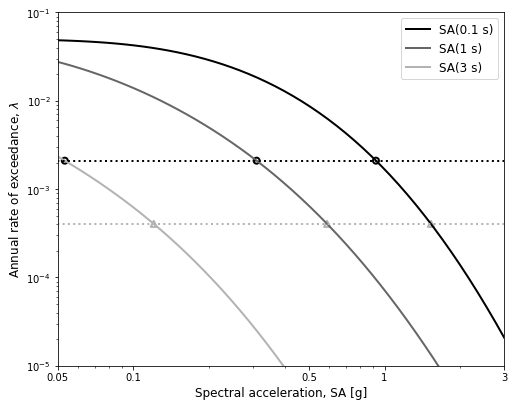

In [5]:
# Plot Fig 7.11: hazard curve
colorSpec = [0, 0.4, 0.7]
plt.figure(1)
fig, ax = plt.subplots(figsize=(8, 6.5))
legendText = []
for i in range(len(TExample)):
    legendText.append("SA(" + str(TExample[i]) + " s)") 
    ax.plot(x, lambdaEx[i]["x"], linewidth=2, color=list(colorSpec[i]*np.array([1, 1, 1])), label=legendText[i])

ax.plot([0.001, 10], list(UHS_rate*np.array([1, 1])), ':k', linewidth=2)
ax.plot([0.001, 10], list(UHS_rate_alt*np.array([1, 1])), ':k', linewidth=2, color=[0.7, 0.7, 0.7])
ax.scatter(UHSEx, list(UHS_rate*np.ones(len(TExample))), facecolors='none', edgecolor='k', linewidth=2)
ax.scatter(UHSEx_alt, list(UHS_rate_alt*np.ones(len(TExample))), marker='^', facecolors='none', edgecolor=[0.7, 0.7, 0.7], linewidth=2)

ax.set_xlabel('Spectral acceleration, SA [g]', fontsize = 12)
ax.set_ylabel('Annual rate of exceedance, $\lambda$', fontsize = 12)
ax.set_ylim(1e-5, 1e-1)
ax.set_xlim(0.05, 3)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc='upper right', fontsize=12)
ax.set_xticks(figureXTickVals)
ax.set_xticklabels(figureXTickVals)


<Figure size 432x288 with 0 Axes>

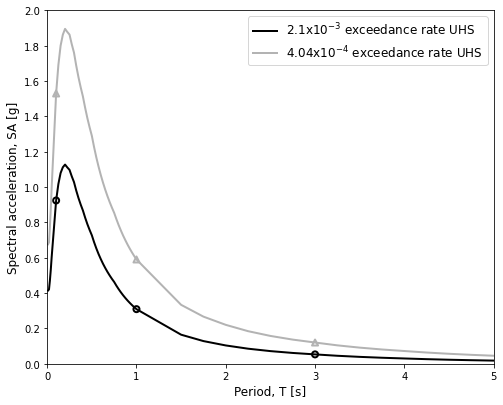

In [6]:
# Plot Fig 7.12: UHS
plt.figure(2)
fig, ax = plt.subplots(figsize=(8, 6.5))
ax.plot(TFull, list(UHS), '-k', linewidth=2, label='2.1x$10^{-3}$ exceedance rate UHS')
ax.plot(TFull, list(UHS_alt), linewidth=2, color=[0.7, 0.7, 0.7], label='4.04x$10^{-4}$ exceedance rate UHS')
ax.scatter(TExample, UHSEx, facecolors='none', edgecolor='k', linewidth=2)
ax.scatter(TExample, UHSEx_alt, marker='^', facecolors='none', edgecolor=[0.7, 0.7, 0.7], linewidth=2)

ax.set_xlabel('Period, T [s]', fontsize = 12)
ax.set_ylabel('Spectral acceleration, SA [g]', fontsize = 12)
ax.set_ylim(0, 2)
ax.set_xlim(0, 5)
ax.legend(loc='upper right', fontsize=12)
ax.set_yticks(np.arange(0, 2.2, step = 0.2))


For SA(0.1 s), $\bar{M}$ = 5.9, $\bar{\varepsilon}$ = 1.9
For SA(3 s), $\bar{M}$ = 6.5, $\bar{\varepsilon}$ = 1.2


<Figure size 432x288 with 0 Axes>

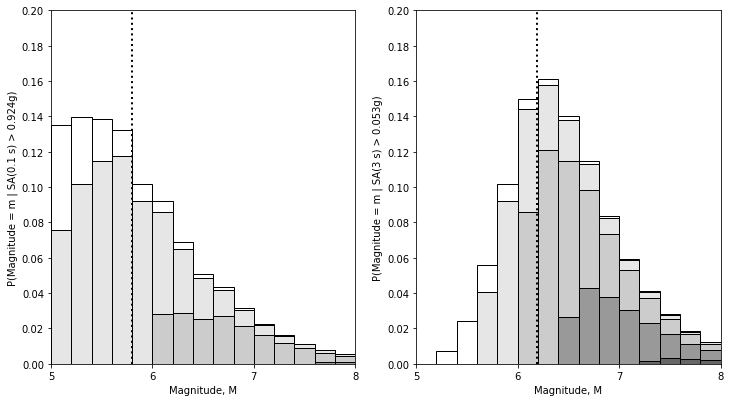

In [7]:
# Plot Fig 7.13: disaggs
disaggIdx = [0, 2]  # indices of example periods to perform disaggration at
n_cols = int(-(-len(disaggIdx)//2)) 
plt.figure(3)
fig, subplots = plt.subplots(n_cols, 2, figsize=(12,6.5*n_cols))
c = ['0', '0.2', '0.4', '0.6', '0.8', '0.9', '1']
example_output = list(np.zeros(max(disaggIdx) + 1))
disaggUHS = list(np.zeros(max(disaggIdx) + 1))
i = 0
for ax in subplots:
    if i < len(disaggIdx):
        idx = disaggIdx[i]
        x_example = UHSEx[idx]  # example values for table
        lambda0, example_output[idx], disaggUHS[idx] = fn_PSHA_given_M_lambda(lambda_M, M_vals, TExample[idx], x, x_example, rup, gmpeFlag)

        for j in range(disaggUHS[idx]["M_Eps"].shape[1]):
            bottom=np.sum(disaggUHS[idx]["M_Eps"][:,0:j], axis=1)
            ax.bar(M_vals, disaggUHS[idx]["M_Eps"][:,j], bottom=bottom, width=0.2, edgecolor = 'k', color=c[j])
        meanM = np.sum(np.array(M_vals) * np.array(disaggUHS[idx]["equal"]))
        ax.plot([meanM, meanM], [0, 1], ':k', linewidth=2) # plot mean magnitude   
        ax.set_xlabel("Magnitude, M")  
        ax.set_ylabel("P(Magnitude = m | " + legendText[idx] + " > " + str(format(x_example,".3f")) + "g)")
        ax.set_xlim(5, 8)
        ax.set_ylim(0, 0.2)
        ax.set_yticks(np.arange(0, 0.22, step = 0.02))
        ax.set_xticks(np.arange(5, 9, step = 1))  
        optext = "For " + legendText[idx] + ', ' + r"$\bar{M}$ = " + str(format(disaggUHS[idx]["Mbar"],".1f")) + ', ' + r"$\bar{\varepsilon}$ = " + str(format(disaggUHS[idx]["epsBar"],".1f"))
        print(optext)
    i += 1


<Figure size 432x288 with 0 Axes>

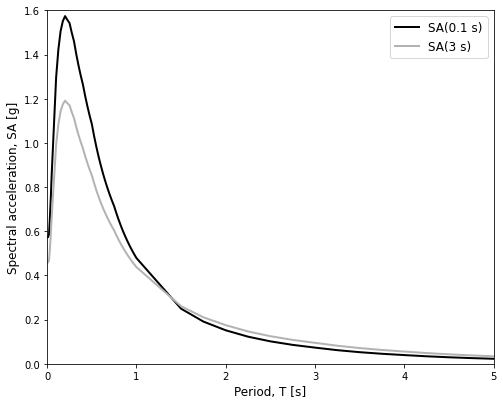

In [8]:
# Plot Fig 7.14: spectra associated with disaggs
plt.figure(4)
fig, ax = plt.subplots(figsize=(8, 6.5))
c = ['0', '0.7']
sa = np.zeros((len(disaggIdx),len(TFull)))
sigma = np.zeros((len(disaggIdx),len(TFull)))
for i in range(len(disaggIdx)):
    idx = disaggIdx[i]
    for j in range(len(TFull)):
        sa[i][j], sigma[i][j] = gmpe_eval(TFull[j], disaggUHS[idx]["Mbar"], rup, gmpeFlag)
    ax.plot(TFull, np.exp(np.log(sa[i])+disaggUHS[idx]["epsBar"]*sigma[i]), linewidth=2, color=c[i], label=legendText[disaggIdx[i]])
    
ax.set_xlabel('Period, T [s]', fontsize = 12)
ax.set_ylabel('Spectral acceleration, SA [g]', fontsize = 12)
ax.set_ylim(0, 1.6)
ax.set_xlim(0, 5)
ax.legend(loc='upper right', fontsize=12)


In [9]:
# Superimpose actual records on the UHS

# load NGA-West2 data
hf = h5py.File('NGA_W2_meta_data.h5', 'r')
Sa_RotD50 = np.array(hf.get('Sa_RotD50'))
magnitude = np.array(hf.get('magnitude'))
closest_D = np.array(hf.get('closest_D'))
Periods = np.array(hf.get('Periods'))
soil_Vs30 = np.array(hf.get('soil_Vs30'))

criteria = {"min_M":5.6, "max_M":6.2, "min_R":5, "max_R":15, "min_Vs30":400, "max_Vs30":600}

acceptable = ((magnitude >= criteria["min_M"]) & (magnitude <= criteria["max_M"]) & (closest_D >= criteria["min_R"]) \
              & (closest_D <= criteria["max_R"]) & (soil_Vs30 >= criteria["min_Vs30"]) &  (soil_Vs30 <= criteria["max_Vs30"]))

numRecs = np.sum(acceptable)

Sa_RotD50_use = Sa_RotD50[acceptable,:]

<ipython-input-9-399105760883>:14: RuntimeWarning: invalid value encountered in greater_equal
  & (closest_D <= criteria["max_R"]) & (soil_Vs30 >= criteria["min_Vs30"]) &  (soil_Vs30 <= criteria["max_Vs30"]))
<ipython-input-9-399105760883>:14: RuntimeWarning: invalid value encountered in less_equal
  & (closest_D <= criteria["max_R"]) & (soil_Vs30 >= criteria["min_Vs30"]) &  (soil_Vs30 <= criteria["max_Vs30"]))


([<matplotlib.axis.YTick at 0x7fd4ec84eb80>,
 <a list of 11 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

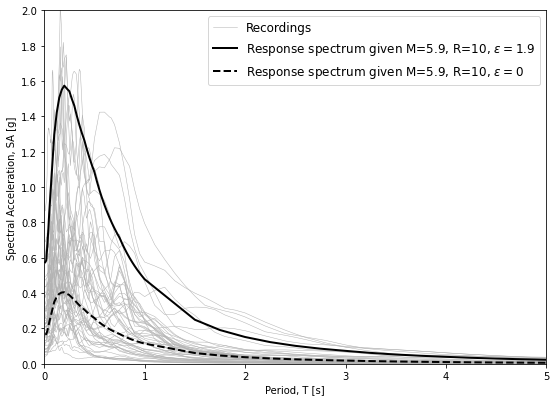

In [10]:
# Plot Fig 7.15
plt.figure(4)
plt.figure(figsize=(9, 6.5))
for i in range(len(Sa_RotD50_use)-1):
    plt.plot(Periods, Sa_RotD50_use[i], linewidth=0.5, color=[0.7, 0.7, 0.7])
plt.plot(Periods, Sa_RotD50_use[-1], linewidth=0.5, color=[0.7, 0.7, 0.7], label="Recordings")
idx = disaggIdx[0]
plt.plot(TFull, np.exp(np.log(sa[0])+disaggUHS[idx]["epsBar"]*sigma[0]), '-k', linewidth=2, label=r"Response spectrum given M=5.9, R=10, $\varepsilon=1.9$")
plt.plot(TFull, sa[0], '--k', linewidth=2, label=r"Response spectrum given M=5.9, R=10, $\varepsilon=0$")
plt.xlabel('Period, T [s]')
plt.ylabel('Spectral Acceleration, SA [g]')
plt.legend(loc='upper right', fontsize=12)
plt.xlim(0, 5)
plt.ylim(0, 2)
plt.yticks(np.arange(0, 2.2, step = 0.2))


In [11]:
# Associated tabular data

# probabilities of exceedance
summaryOutput = np.around(np.transpose(example_output[disaggIdx[0]][0:4] + [example_output[disaggIdx[1]][3]]), decimals=4)
np.set_printoptions(suppress=True, precision=4)
print(summaryOutput)

# kernel of the PSHA term
summaryOutput2 = np.array(example_output[disaggIdx[0]][0:3] + [example_output[disaggIdx[0]][4]] + [example_output[disaggIdx[1]][4]])


[[ 0.      5.1     0.0185  0.0145  0.0003]
 [ 1.      5.3     0.0117  0.026   0.0016]
 [ 2.      5.5     0.0074  0.0405  0.0077]
 [ 3.      5.7     0.0046  0.0579  0.0281]
 [ 4.      5.9     0.0029  0.0779  0.0769]
 [ 5.      6.1     0.0018  0.1004  0.1617]
 [ 6.      6.3     0.0012  0.1252  0.2746]
 [ 7.      6.5     0.0007  0.152   0.3972]
 [ 8.      6.7     0.0005  0.1905  0.5128]
 [ 9.      6.9     0.0003  0.2296  0.6108]
 [10.      7.1     0.0002  0.2677  0.6898]
 [11.      7.3     0.0001  0.3038  0.7522]
 [12.      7.5     0.0001  0.3376  0.8014]
 [13.      7.7     0.      0.37    0.8404]
 [14.      7.9     0.      0.4005  0.8714]]
